<img src="https://www.bankrate.com/2020/04/13101723/GuideToHotelCancellationsAndEliteStatus.png" />

## Problem Statement
The goal is to create a predictive model that can accurately determine whether a hotel booking will be canceled or not. By analyzing historical data, we aim to identify key factors that contribute to booking cancellations. This model can be valuable for both travelers and hotel proprietors.

## Dataset Details
We'll be working with a dataset that contains booking information for a city hotel and a resort hotel in Portugal. Here are some essential details about the dataset:

1. **Hotel Types**:
   - **Resort Hotel (H1)**: A hotel located in a resort area.
   - **City Hotel (H2)**: A hotel situated in an urban setting.

2. **Target Variable**:
   - **is_canceled**: A binary value indicating whether the booking was canceled (1) or not (0).

3. **Features**:
   - **lead_time**: The number of days between booking entry and arrival date.
   - **arrival_date_year**: The year of the arrival date.
   - **arrival_date_month**: The month when guests arrive.
   - **arrival_date_week_number**: The week number of the year for the arrival date.
   - **arrival_date_day_of_month**: The day of the month when guests arrive.
   - **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked.
   - **stays_in_week_nights**: Number of weekdays stay at night (Monday to Friday) in the hotel.
   - **adults**, **children**, **babies**: Number of guests (adults, children, and babies).
   - **meal**: Type of meal booked.
   - **country**: Country of origin.
   - **market_segment**: Channel through which hotels were booked.
   - **distribution_channel**: Booking distribution channel.
   - **is_repeated_guest**: Indicates if the booking name is from a repeated guest (1) or not (0).
   - **previous_cancellations**: Whether a repeated guest has canceled a booking before.
   - **previous_bookings_not_canceled**: Whether a repeated guest has not canceled a booking before.
   - **reserved_room_type**: Code for the reserved room type (anonymized).
   - **assigned_room_type**: Code for the room type assigned to the booking (anonymized).

## Dataset Source
The dataset used for this project can be found on Kaggle: [Hotel Booking Demand Dataset](https://www.kaggle.com/jessemostipak/hotel-booking-demand).



# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings("ignore")

## Load Dataset 

In [2]:
data = pd.read_csv("hotel_bookings.csv")
pd.set_option('display.max_columns',None)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** is a crucial step in understanding your data before diving into more complex analyses or machine learning. Let's explore the key steps involved in EDA:

1. **Data Collection**:
   - Begin by gathering relevant data. You can find reliable datasets on platforms like **Kaggle**, **GitHub**, or the **Machine Learning Repository**.
   - For instance, consider the **housing dataset** available on Kaggle, which contains information about houses and their sale prices¹.

2. **Data Cleaning**:
   - Clean your dataset by removing unwanted variables and values.
   - Address irregularities and anomalies that might skew the data.
   - A clean dataset ensures accurate results.

3. **Understanding Data Characteristics**:
   - Use visual and numerical techniques to explore your data.
   - Identify patterns, correlations, and relationships.
   - Recognize which variables are significant for your analysis.

4. **Visualization**:
   - Create visualizations (such as scatter plots, histograms, and box plots) to gain insights.
   - Understand data distributions, central tendencies, and spread.
   - Visualizations help you grasp the data's structure and uncover hidden trends.

5. **Feature Engineering**:
   - Transform or create new features from existing ones.
   - Feature engineering enhances model performance by providing relevant information.

6. **Statistical Summary**:
   - Compute descriptive statistics (mean, median, standard deviation, etc.).
   - Understand the central tendencies and variability of your data.


In [3]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Data Info

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data["is_canceled"].value_counts(normalize=True)

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64

In [6]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Data Cleaning
Clean your dataset by removing unwanted variables and values.
Address irregularities and anomalies that might skew the data.


### Info no of missing value and percetage

In [7]:
# data.isnull().sum() ,data.isnull().sum()/len(data)*100
pd.DataFrame({"Index":data.columns  , "No of Null values" : data.isnull().sum() , "% of Null values" :data.isnull().sum()/len(data)*100})

,Index,No of Null values,% of Null values
hotel,hotel,0,0.000000
is_canceled,is_canceled,0,0.000000
lead_time,lead_time,0,0.000000
arrival_date_year,arrival_date_year,0,0.000000
arrival_date_month,arrival_date_month,0,0.000000
arrival_date_week_number,arrival_date_week_number,0,0.000000
arrival_date_day_of_month,arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,stays_in_weekend_nights,0,0.000000
stays_in_week_nights,stays_in_week_nights,0,0.000000
adults,adults,0,0.000000



### company has 94% of null values, so we can drop it.
#### And remaining 3 feature are ['children' , 'country' , 'agent'] has 0.003% , 0.4% , 13% and dtype int , char , int  respectively  

In [8]:
#dropig company feature 
data.drop(["company"], axis = 1 , inplace = True )

In [9]:
#Appending null columns in a list 

null_columns = []
for column in data.columns:
    if data[column].isnull().sum():
        null_columns.append(column)
null_columns

['children', 'country', 'agent']

children 4.11258954232252


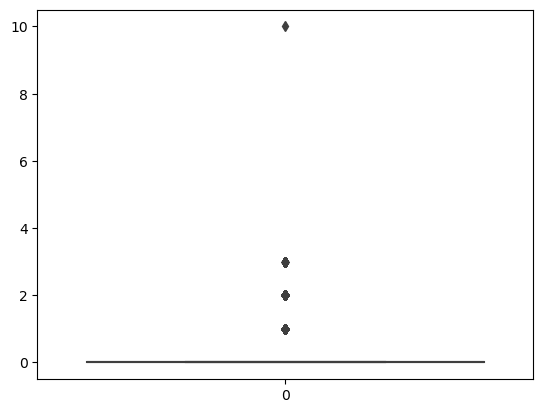

agent 1.089385636108877


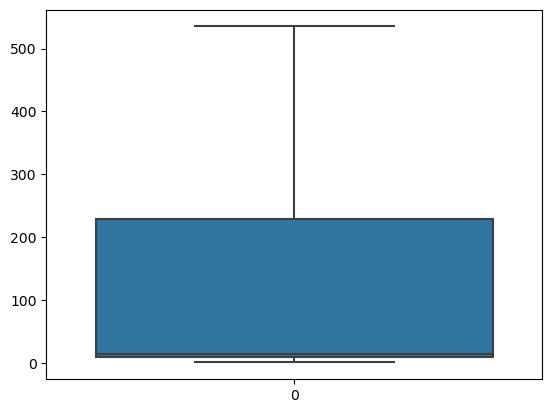

In [10]:
# visuvalising the null feature to observe the Distribution
def plot(box):
    sns.boxplot(box)
    plt.show()
for column in null_columns:

    if column == "country":
        continue
    else:
        print(column , data[column].skew())
        plot(data[column])

In [11]:
#clearly it show right skew so, we use median to impute null values

# int dtype children and agent

for column in null_columns:
    if data.dtypes[column] == np.number:
        data[column].fillna(data[column].median() , inplace = True)


In [12]:
# char dtype country
data["country"].value_counts().index[0:6]

Index(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA'], dtype='object', name='country')

In [13]:
data["country"].value_counts()[0:6]

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
Name: count, dtype: int64

In [14]:
data["country"].value_counts()[0:6]/len(data)*100

country
PRT    40.698551
GBR    10.159142
FRA     8.723511
ESP     7.176480
DEU     6.103526
ITA     3.154368
Name: count, dtype: float64

#### Majorty persons comes from PRT country which is 40%


In [15]:

data["country"].fillna(data["country"].mode()[0], inplace = True )
data["country"][data["country"] == "PRT" ] = 1
data["country"][~(data["country"] == 1)] = 0




In [16]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# checking the outliers

lead_time 1.3465498727254268


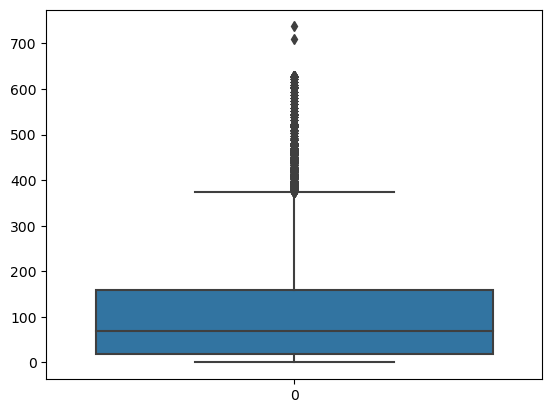

arrival_date_year -0.2325832518127746


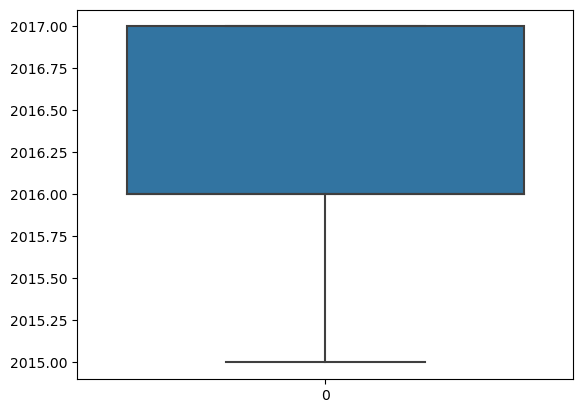

arrival_date_week_number -0.010014326041540811


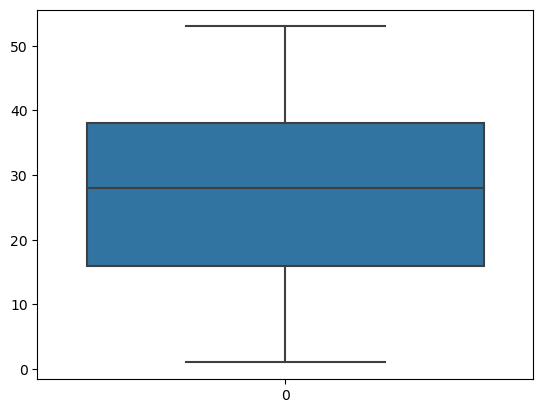

arrival_date_day_of_month -0.0020004539786149557


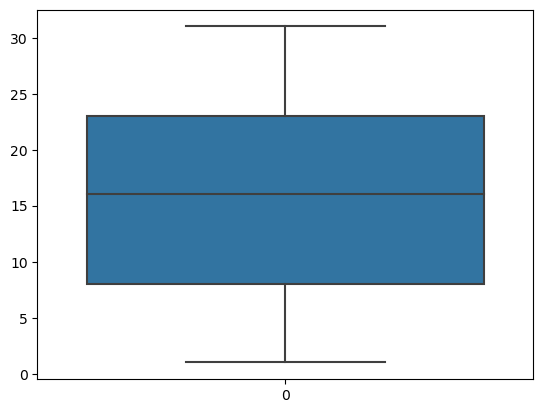

stays_in_weekend_nights 1.3800464497062852


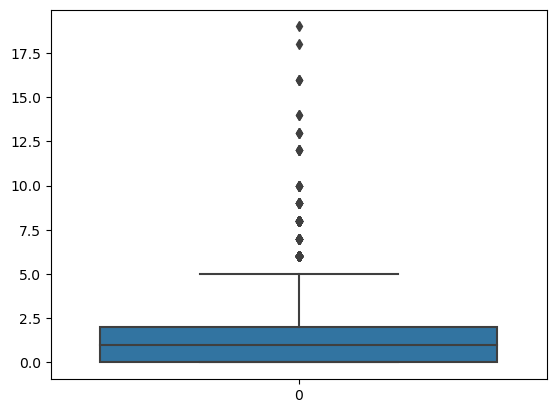

stays_in_week_nights 2.862249242067124


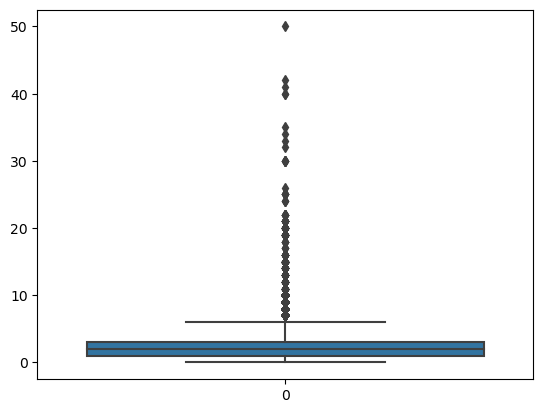

adults 18.317804759206094


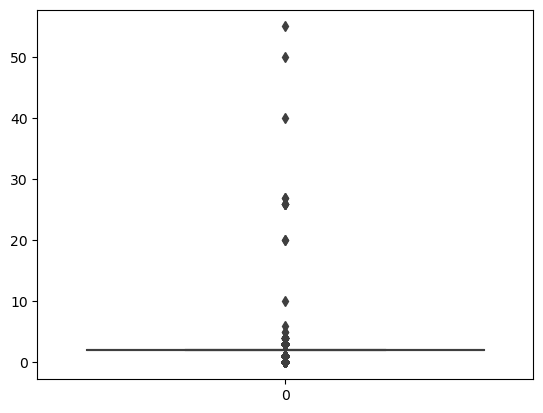

children 4.112669999376718


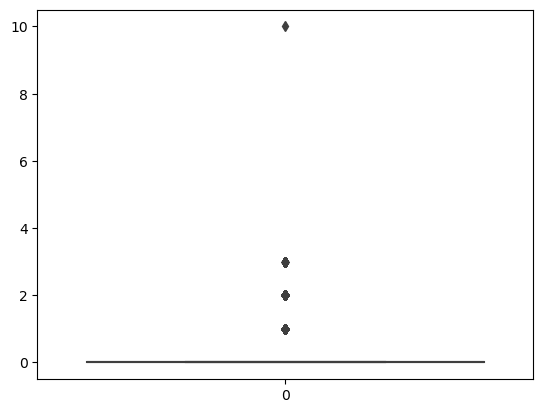

babies 24.646544829663075


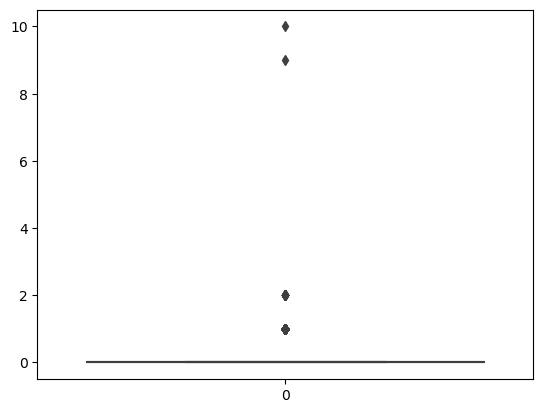

is_repeated_guest 5.326315335062105


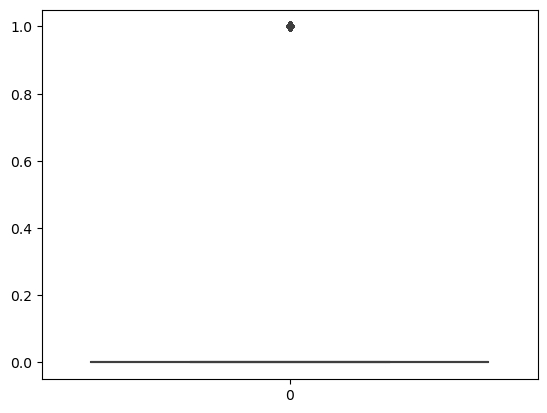

previous_cancellations 24.458048723119287


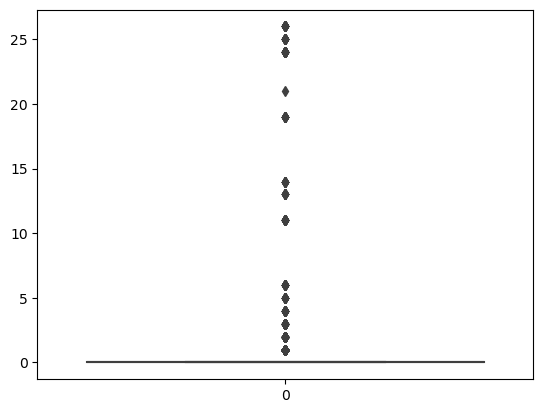

previous_bookings_not_canceled 23.53979995284346


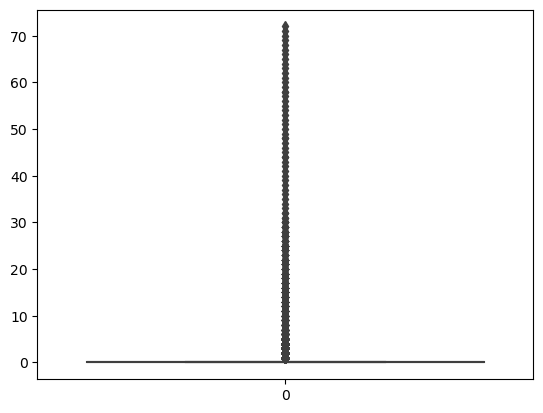

booking_changes 6.00027005440932


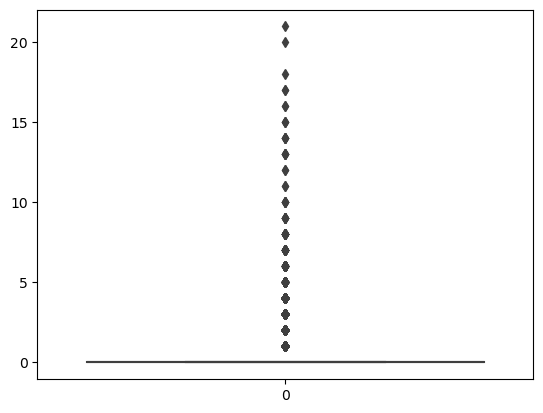

agent 1.314455783340046


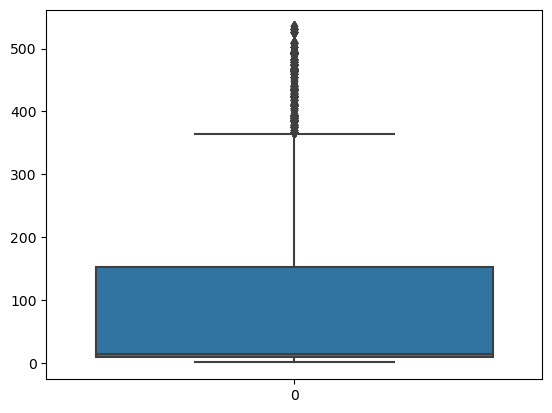

days_in_waiting_list 11.944353446438399


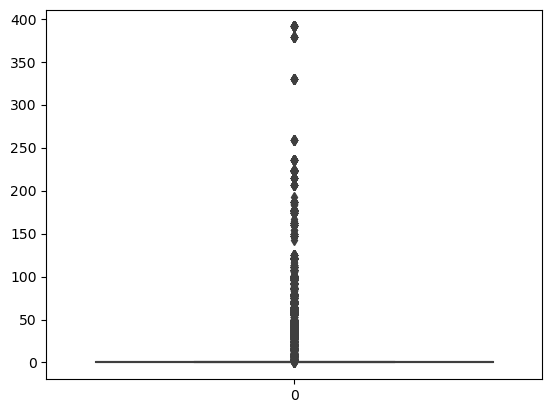

adr 10.53021398218952


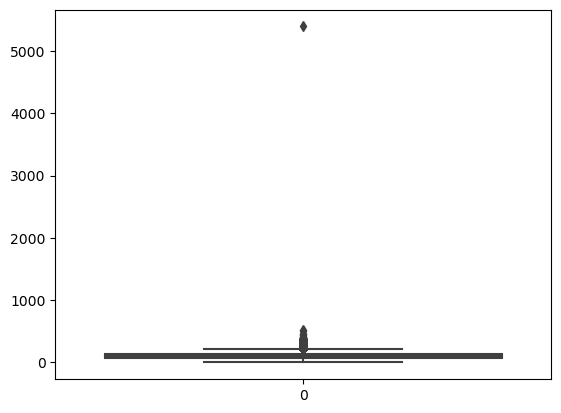

required_car_parking_spaces 4.163233237874088


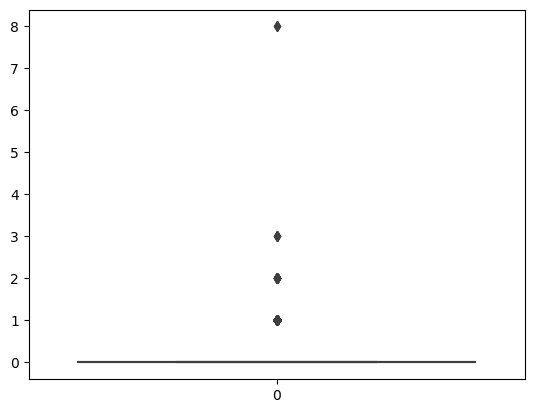

total_of_special_requests 1.3491893774222594


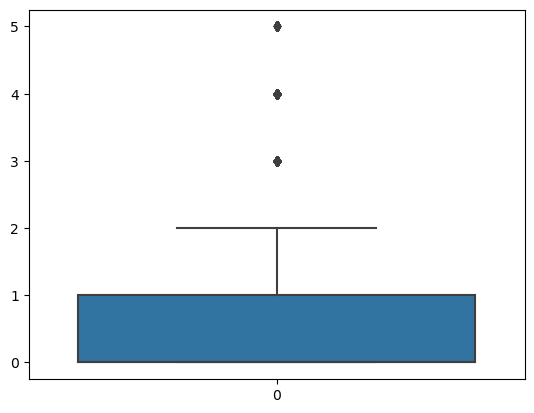

In [17]:
# visuvalising the null feature to observe the Distribution
def plot(box):
    sns.boxplot(box)
    plt.show()
for column in data.select_dtypes(exclude="object").drop("is_canceled" , axis = 1):
    print(column , data[column].skew())
    plot(data[column])

### Treating outliers with IQR method

In [18]:
outlier_columns = list(data.select_dtypes(exclude='object').drop(["is_canceled"] , axis = 1).columns)
outlier_columns ,len(outlier_columns)

(['lead_time',
  'arrival_date_year',
  'arrival_date_week_number',
  'arrival_date_day_of_month',
  'stays_in_weekend_nights',
  'stays_in_week_nights',
  'adults',
  'children',
  'babies',
  'is_repeated_guest',
  'previous_cancellations',
  'previous_bookings_not_canceled',
  'booking_changes',
  'agent',
  'days_in_waiting_list',
  'adr',
  'required_car_parking_spaces',
  'total_of_special_requests'],
 18)

In [19]:
for column in outlier_columns:
    data[column] = pd.to_numeric(data[column])

In [20]:
for column in outlier_columns:
    data[column] = data[column].astype(int)
    if data[column].skew() >= 5 or data[column].skew() <= -5 :
        continue
    else:
        outlier_columns.remove(column)
    
outlier_columns ,len(outlier_columns)

(['arrival_date_year',
  'arrival_date_day_of_month',
  'stays_in_week_nights',
  'adults',
  'babies',
  'is_repeated_guest',
  'previous_cancellations',
  'previous_bookings_not_canceled',
  'booking_changes',
  'days_in_waiting_list',
  'adr',
  'total_of_special_requests'],
 12)

In [21]:
def outlier(data, outlier_columns):
    for column in outlier_columns:
        iq1 = np.percentile(data[column] , 25 , method="linear")
        iq3 = np.percentile(data[column] , 75 , method="linear")
        iqr = iq3 - iq1
        ll = iq1- 1.5*iqr
        ul = iq3 - 1.5*iqr
        data[column][data[column] <= ll] = ll
        data[column][data[column] >= ul] = ul
        
        
outlier(data,outlier_columns)     

arrival_date_year -1.6290234104538297


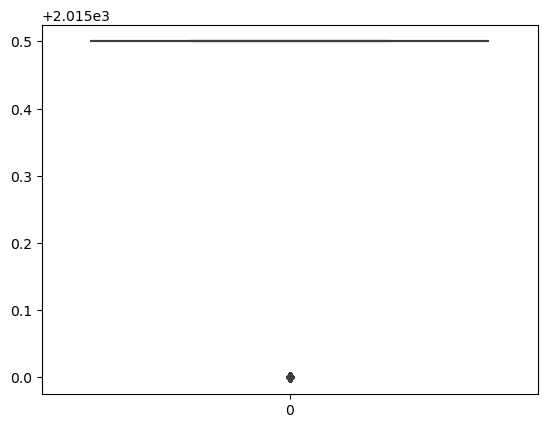

arrival_date_day_of_month 0


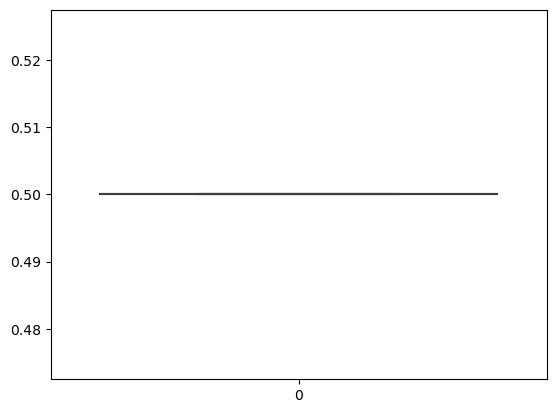

stays_in_week_nights 0


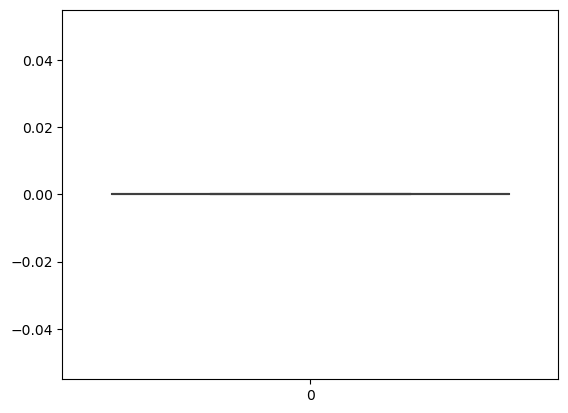

adults 0


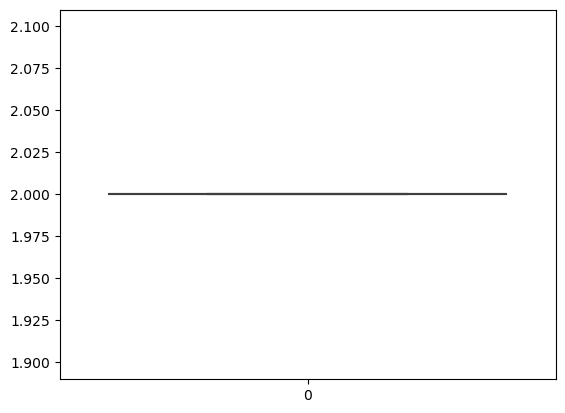

babies 0


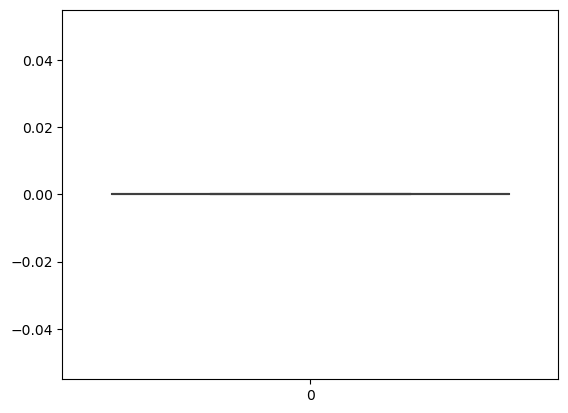

is_repeated_guest 0


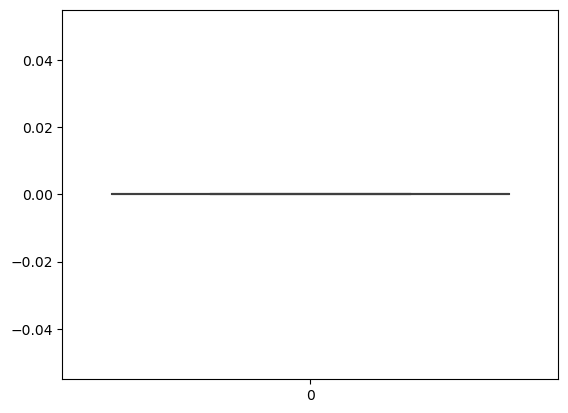

previous_cancellations 0


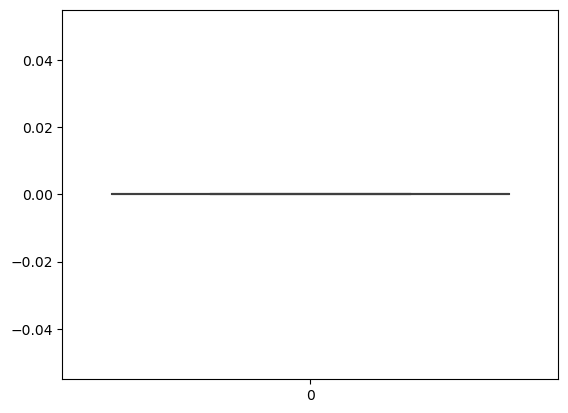

previous_bookings_not_canceled 0


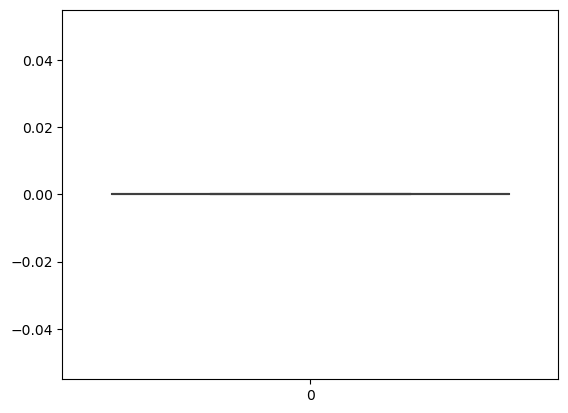

booking_changes 0


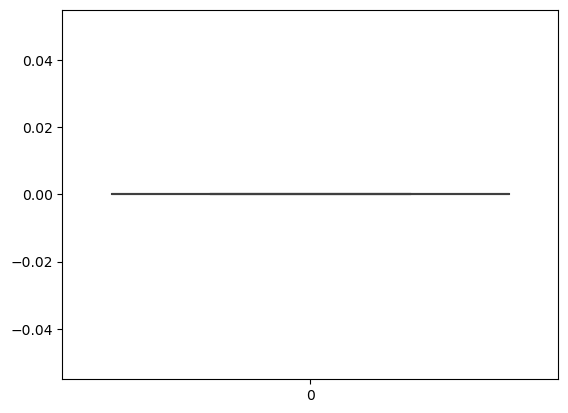

days_in_waiting_list 0


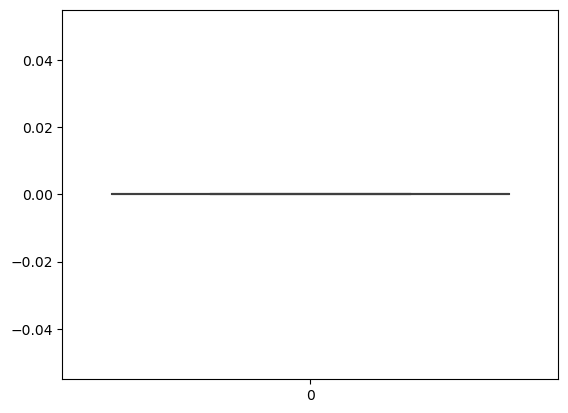

adr -6.3503235694263305


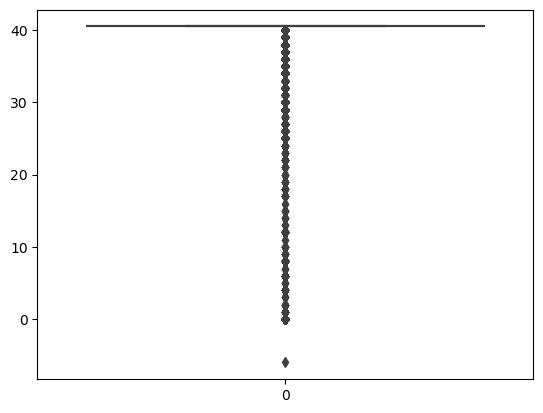

total_of_special_requests 0


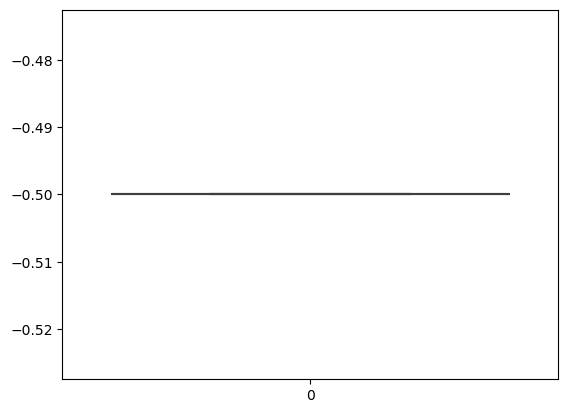

In [22]:
def plot(box):
    sns.boxplot(box)
    plt.show()
for column in outlier_columns:
    print(column , data[column].skew())
    plot(data[column])

In [23]:
data["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [24]:
data["arrival_date_month"] = data["arrival_date_month"].apply(lambda x: datetime.datetime.strptime(x, '%B').month )
data["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"])
data["reservation_status_day"] = data["reservation_status_date"].dt.day
data["reservation_status_month"] =  data["reservation_status_date"].dt.month
data["reservation_status_year"] =  data["reservation_status_date"].dt.year
data.drop(['reservation_status'] , axis = 1 , inplace = True)

In [25]:
data.select_dtypes(exclude='object').drop('is_canceled', axis = 1).corr()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,reservation_status_day,reservation_status_month,reservation_status_year
lead_time,1.000000,0.030087,0.131424,0.126871,NaN,0.085671,NaN,NaN,-0.037613,NaN,NaN,NaN,NaN,NaN,-0.020967,NaN,0.093459,-0.116451,NaN,-0.072317,-0.007655,0.055905,-0.084754
arrival_date_year,0.030087,1.000000,-0.438955,-0.435017,NaN,-0.001007,NaN,NaN,0.050311,NaN,NaN,NaN,NaN,NaN,0.033072,NaN,0.050237,0.002038,NaN,0.684659,0.036198,-0.311552,0.720287
arrival_date_month,0.131424,-0.438955,1.000000,0.995105,NaN,0.018440,NaN,NaN,0.005437,NaN,NaN,NaN,NaN,NaN,-0.018924,NaN,-0.010676,0.000257,NaN,-0.200689,-0.020058,0.682759,-0.441439
arrival_date_week_number,0.126871,-0.435017,0.995105,1.000000,NaN,0.018208,NaN,NaN,0.005515,NaN,NaN,NaN,NaN,NaN,-0.019919,NaN,-0.010733,0.001920,NaN,-0.212199,0.009862,0.680231,-0.451574
arrival_date_day_of_month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stays_in_weekend_nights,0.085671,-0.001007,0.018440,0.018208,NaN,1.000000,NaN,NaN,0.045794,NaN,NaN,NaN,NaN,NaN,0.157568,NaN,0.057476,-0.018554,NaN,0.046364,0.013436,0.004530,0.038512
stays_in_week_nights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adults,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
children,-0.037613,0.050311,0.005437,0.005515,NaN,0.045794,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.049095,NaN,0.016803,0.056255,NaN,0.069875,0.010013,-0.006545,0.063529
babies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data.select_dtypes(exclude='object').corr().head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,reservation_status_day,reservation_status_month,reservation_status_year
is_canceled,1.000000,0.293123,0.000254,0.011022,0.008148,NaN,-0.001791,NaN,NaN,0.005036,NaN,NaN,NaN,NaN,NaN,-0.051711,NaN,0.076816,-0.195498,NaN,-0.165057,-0.034131,-0.068605,-0.117036
lead_time,0.293123,1.000000,0.030087,0.131424,0.126871,NaN,0.085671,NaN,NaN,-0.037613,NaN,NaN,NaN,NaN,NaN,-0.020967,NaN,0.093459,-0.116451,NaN,-0.072317,-0.007655,0.055905,-0.084754
arrival_date_year,0.000254,0.030087,1.000000,-0.438955,-0.435017,NaN,-0.001007,NaN,NaN,0.050311,NaN,NaN,NaN,NaN,NaN,0.033072,NaN,0.050237,0.002038,NaN,0.684659,0.036198,-0.311552,0.720287
arrival_date_month,0.011022,0.131424,-0.438955,1.000000,0.995105,NaN,0.018440,NaN,NaN,0.005437,NaN,NaN,NaN,NaN,NaN,-0.018924,NaN,-0.010676,0.000257,NaN,-0.200689,-0.020058,0.682759,-0.441439
arrival_date_week_number,0.008148,0.126871,-0.435017,0.995105,1.000000,NaN,0.018208,NaN,NaN,0.005515,NaN,NaN,NaN,NaN,NaN,-0.019919,NaN,-0.010733,0.001920,NaN,-0.212199,0.009862,0.680231,-0.451574


In [27]:
uncorr_columne = [
    "arrival_date_day_of_month","stays_in_week_nights","adults","babies","is_repeated_guest","previous_cancellations","previous_bookings_not_canceled",
    "booking_changes","days_in_waiting_list" , "total_of_special_requests"
]


data.drop(uncorr_columne , axis = 1 , inplace = True)

### Treating categorical features

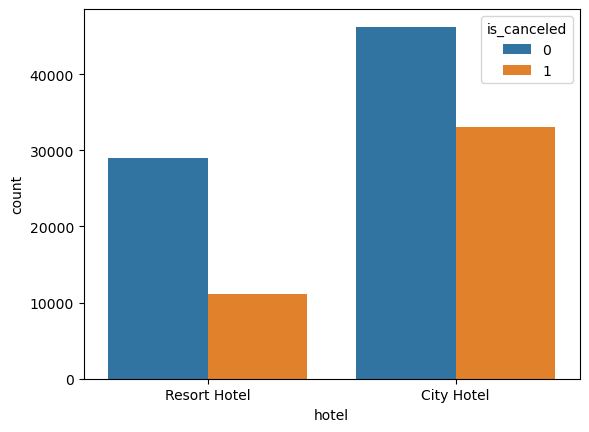

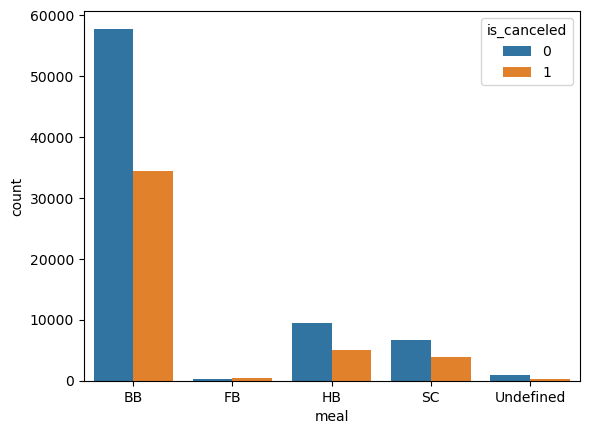

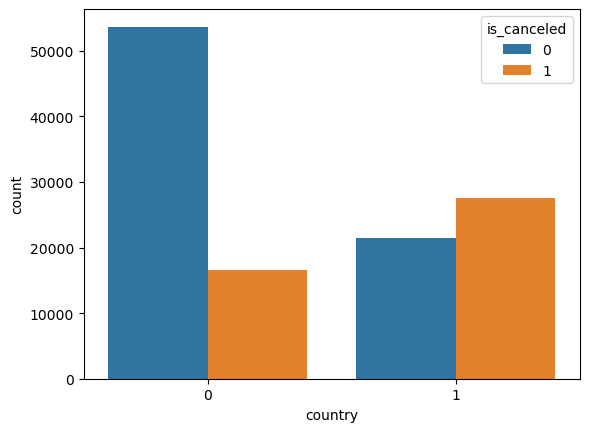

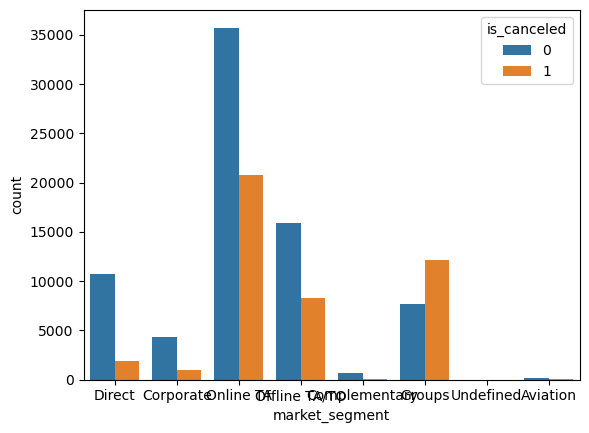

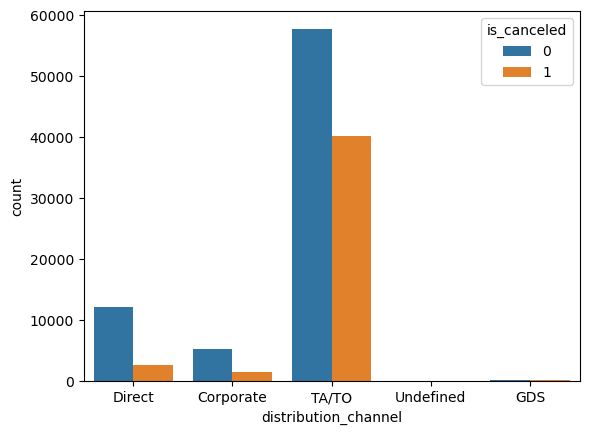

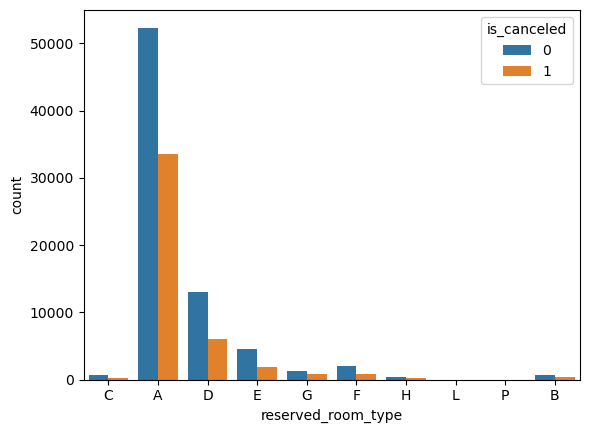

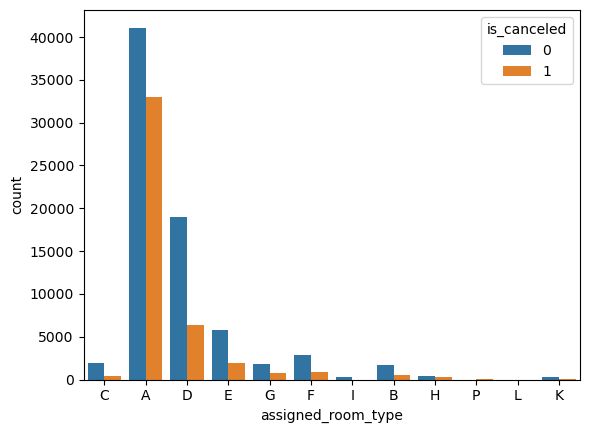

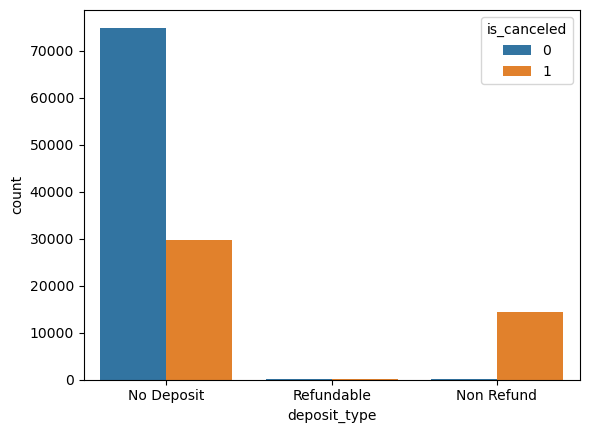

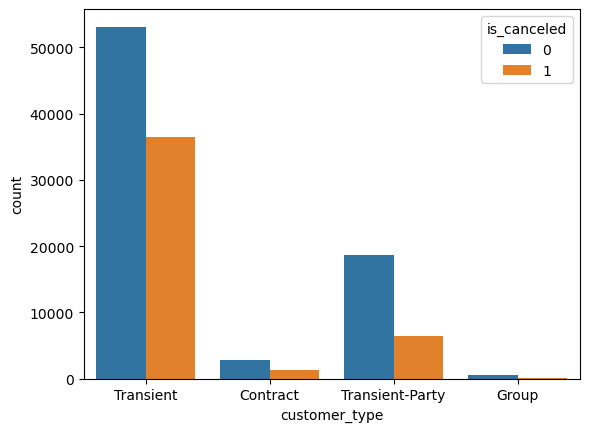

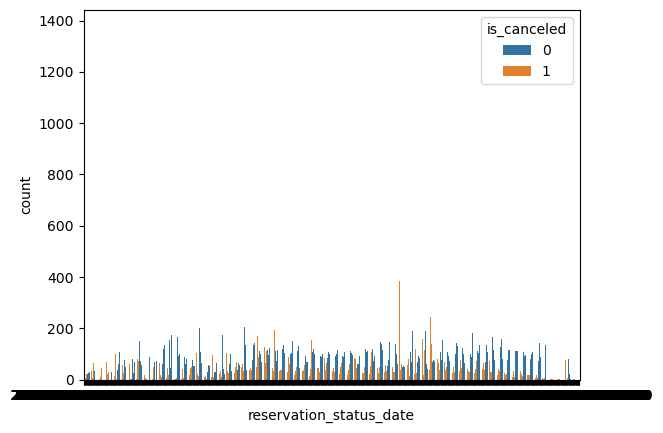

In [28]:

for column in data.select_dtypes(exclude=np.number):
    sns.countplot(x = column , hue = "is_canceled" , data = data)
    plt.show()

In [29]:

# for column in label_encoding:
#     sns.countplot(x = column , hue = "is_canceled" , data = data)
#     plt.show()

In [30]:
label_encoding = ['hotel' ,'meal', 'market_segment', 'distribution_channel', 'deposit_type' , 'customer_type', 
                 "reserved_room_type" , "assigned_room_type" ]
for i in label_encoding:
    print("-----------------"*4)
    print(i , data[i].unique())

--------------------------------------------------------------------
hotel ['Resort Hotel' 'City Hotel']
--------------------------------------------------------------------
meal ['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------------------------
market_segment ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
--------------------------------------------------------------------
distribution_channel ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
--------------------------------------------------------------------
deposit_type ['No Deposit' 'Refundable' 'Non Refund']
--------------------------------------------------------------------
customer_type ['Transient' 'Contract' 'Transient-Party' 'Group']
--------------------------------------------------------------------
reserved_room_type ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
--------------------------------------------------------------------
assigned

In [31]:
data = pd.get_dummies(data , columns = label_encoding , drop_first=True , dtype= int)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 56 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   is_canceled                     119390 non-null  int64         
 1   lead_time                       119390 non-null  int32         
 2   arrival_date_year               119390 non-null  float64       
 3   arrival_date_month              119390 non-null  int64         
 4   arrival_date_week_number        119390 non-null  int32         
 5   stays_in_weekend_nights         119390 non-null  int32         
 6   children                        119390 non-null  int32         
 7   country                         119390 non-null  object        
 8   agent                           119390 non-null  int32         
 9   adr                             119390 non-null  float64       
 10  required_car_parking_spaces     119390 non-null  int32  

In [33]:
data.drop(["reservation_status_date"] , axis = 1 , inplace = True)

In [35]:
def boxplot(column):
    sns.displot(column , kind = 'kde')
    
for column in data:
    boxplot(data[column])

In [36]:
data.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'stays_in_weekend_nights', 'children',
       'country', 'agent', 'adr', 'required_car_parking_spaces',
       'reservation_status_day', 'reservation_status_month',
       'reservation_status_year', 'hotel_Resort Hotel', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reserved_room_type_B',
       'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_

### Spliting Data into Train and Test

In [37]:
x = data.drop(["is_canceled"] , axis = 1)
y = data["is_canceled"]

In [38]:
x.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'stays_in_weekend_nights', 'children',
       'country', 'agent', 'adr', 'required_car_parking_spaces',
       'reservation_status_day', 'reservation_status_month',
       'reservation_status_year', 'hotel_Resort Hotel', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'reserved_room_type_B',
       'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E',
      

In [39]:
from sklearn.model_selection import train_test_split
x_train , y_train , x_test , y_test = train_test_split( x , y , train_size=0.7 , random_state= 42 , stratify=y)

In [40]:
x_train.shape , x_test.shape 


((83573, 54), (83573,))

In [41]:
y_train.shape , y_test.shape 


((35817, 54), (35817,))

In [42]:
x_test.value_counts()/len(x_test)*100

is_canceled
0    62.958132
1    37.041868
Name: count, dtype: float64

In [43]:
y_test.value_counts()/len(y_test)*100

is_canceled
0    62.95893
1    37.04107
Name: count, dtype: float64

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train , x_test)

LogisticRegression(max_iter=1000)

In [45]:
train_predict = lr.predict(x_train)
test_predict = lr.predict(y_train)

In [46]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

print("train confusion matrix  \n", confusion_matrix(train_predict , x_test))

print("test confusion matrix \n", confusion_matrix(test_predict , y_test))
print()

print("train accuracy \n", accuracy_score(train_predict , x_test))
print("test accuracy \n",accuracy_score(test_predict , y_test))
print() 



print("train classfication repot \n" , classification_report(train_predict , x_test))


print()




print("test classfication repot \n" , classification_report(test_predict , y_test))
print()


train confusion matrix  
 [[47409 12496]
 [ 5207 18461]]
test confusion matrix 
 [[20339  5443]
 [ 2211  7824]]

train accuracy 
 0.7881732138370048
test accuracy 
 0.7863025937404026

train classfication repot 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84     59905
           1       0.60      0.78      0.68     23668

    accuracy                           0.79     83573
   macro avg       0.75      0.79      0.76     83573
weighted avg       0.81      0.79      0.80     83573


test classfication repot 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84     25782
           1       0.59      0.78      0.67     10035

    accuracy                           0.79     35817
   macro avg       0.75      0.78      0.76     35817
weighted avg       0.81      0.79      0.79     35817




<Axes: ylabel='Density'>

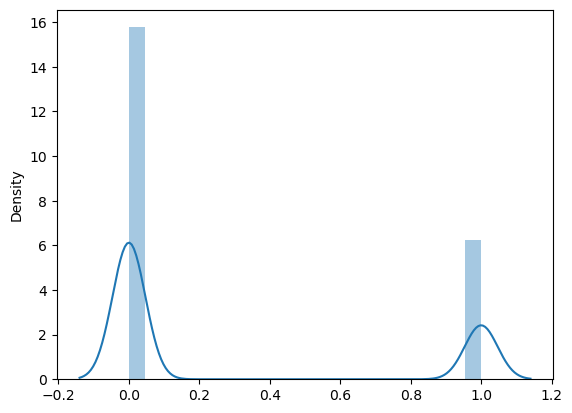

In [47]:
sns.distplot(train_predict)

<Axes: xlabel='is_canceled', ylabel='Density'>

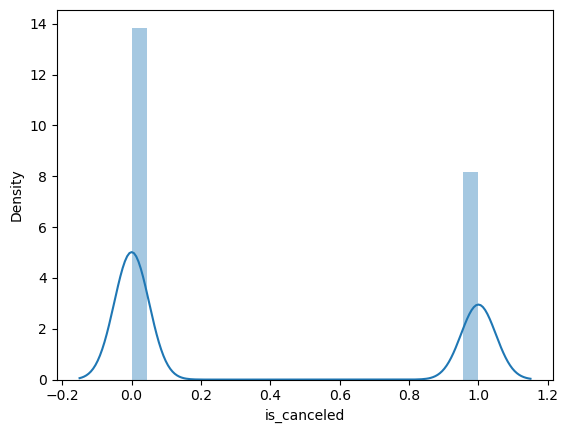

In [48]:
sns.distplot(x_test )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


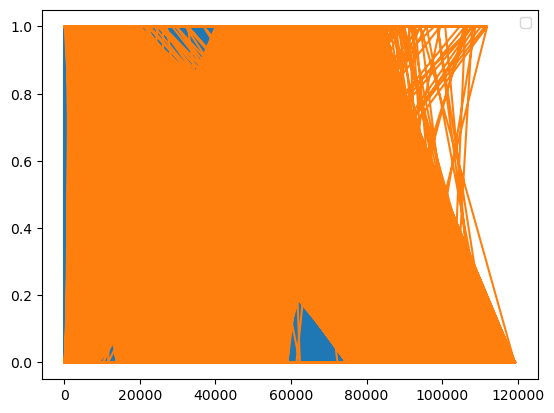

In [49]:
import matplotlib.pyplot as plt

plt.plot(train_predict )
plt.plot(x_test )

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


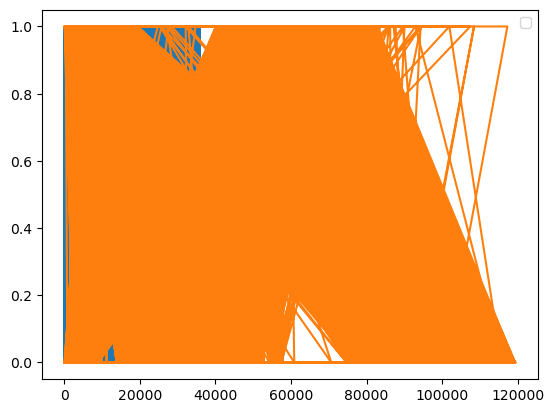

In [50]:
plt.plot(test_predict )
plt.plot(y_test)

plt.legend()

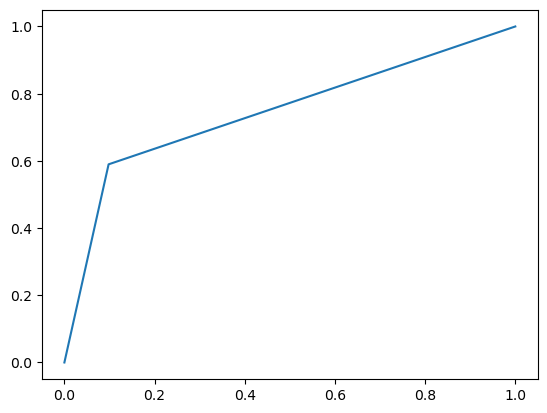

In [51]:
from sklearn import metrics 

false_rate,true_rate,threshold=metrics.roc_curve(y_test,test_predict)

plt.plot(false_rate,true_rate)

In [52]:
metrics.auc(false_rate,true_rate)

0.7458425728977272

In [53]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(x_train, x_test)

DecisionTreeClassifier()

In [54]:
dtc_train = dtc.predict(x_train)
dtc_test = dtc.predict(y_train)
print("train confusion matrix  \n", confusion_matrix(dtc_train , x_test))

print("test confusion matrix \n", confusion_matrix(dtc_test , y_test))
print()

print("train accuracy \n", accuracy_score(dtc_train , x_test))
print("test accuracy \n",accuracy_score(dtc_test , y_test))
print() 



print("train classfication repot \n" , classification_report(dtc_train , x_test))

print()




print("test classfication repot \n" , classification_report(dtc_test , y_test))
print()


train confusion matrix  
 [[52611    20]
 [    5 30937]]
test confusion matrix 
 [[21550   975]
 [ 1000 12292]]

train accuracy 
 0.9997008603257033
test accuracy 
 0.9448585867046375

train classfication repot 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52631
           1       1.00      1.00      1.00     30942

    accuracy                           1.00     83573
   macro avg       1.00      1.00      1.00     83573
weighted avg       1.00      1.00      1.00     83573


test classfication repot 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     22525
           1       0.93      0.92      0.93     13292

    accuracy                           0.94     35817
   macro avg       0.94      0.94      0.94     35817
weighted avg       0.94      0.94      0.94     35817




In [55]:
pd.DataFrame({"features" : x.columns , "feature_importance" :dtc.feature_importances_})

,features,feature_importance
0,lead_time,0.082077
1,arrival_date_year,0.009031
2,arrival_date_month,0.036436
3,arrival_date_week_number,0.196722
4,stays_in_weekend_nights,0.011626
5,children,0.002966
6,country,0.040509
7,agent,0.045886
8,adr,0.004030
9,required_car_parking_spaces,0.023206


### Re-Training 

In [ ]:
unwanted_features = ["reserved_room_type_B",
"reserved_room_type_C",
"reserved_room_type_D",
"reserved_room_type_E",
"reserved_room_type_F",
"reserved_room_type_G",
"reserved_room_type_H",
"reserved_room_type_L",
"reserved_room_type_P",
"assigned_room_type_B",
"assigned_room_type_C",
"assigned_room_type_D",
"assigned_room_type_E",
"assigned_room_type_F",
"assigned_room_type_G",
"assigned_room_type_H",
"assigned_room_type_I",
"assigned_room_type_K",
"assigned_room_type_L",
"assigned_room_type_P"]

x.drop(unwanted_features , axis = 1 , inplace = True)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train , x_test)

train_predict = lr.predict(x_train)
test_predict = lr.predict(y_train)


print("train confusion matrix  \n", confusion_matrix(train_predict , x_test))

print("test confusion matrix \n", confusion_matrix(test_predict , y_test))
print()

print("train accuracy \n", accuracy_score(train_predict , x_test))
print("test accuracy \n",accuracy_score(test_predict , y_test))
print() 



print("train classfication repot \n" , classification_report(train_predict , x_test))


print()




print("test classfication repot \n" , classification_report(test_predict , y_test))
print()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(x_train, x_test)


dtc_train = dtc.predict(x_train)
dtc_test = dtc.predict(y_train)
print("train confusion matrix  \n", confusion_matrix(dtc_train , x_test))

print("test confusion matrix \n", confusion_matrix(dtc_test , y_test))
print()

print("train accuracy \n", accuracy_score(dtc_train , x_test))
print("test accuracy \n",accuracy_score(dtc_test , y_test))
print() 



print("train classfication repot \n" , classification_report(dtc_train , x_test))

print()




print("test classfication repot \n" , classification_report(dtc_test , y_test))
print()
